In [111]:
# Load CSV using Pandas from URL
import pandas as pd
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names)
print(data.shape)

(768, 9)


### Lesson 4: Understand Data with Descriptive Statistics

In [112]:
data = pd.DataFrame(data)

In [113]:
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [114]:
data.shape

(768, 9)

In [115]:
data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [116]:
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [117]:
data.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Lesson 5: Understand Data with Visualization

In [118]:
import matplotlib.pyplot as plt

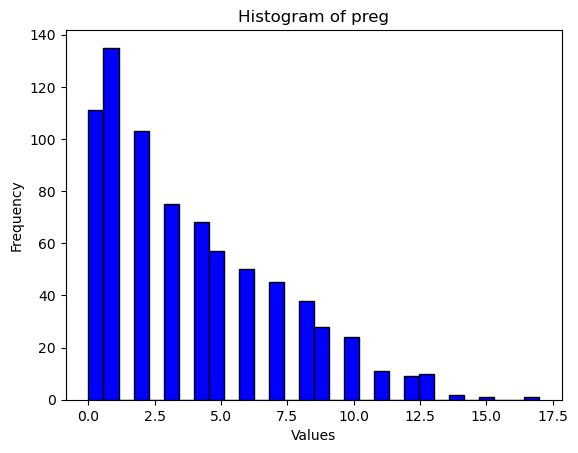

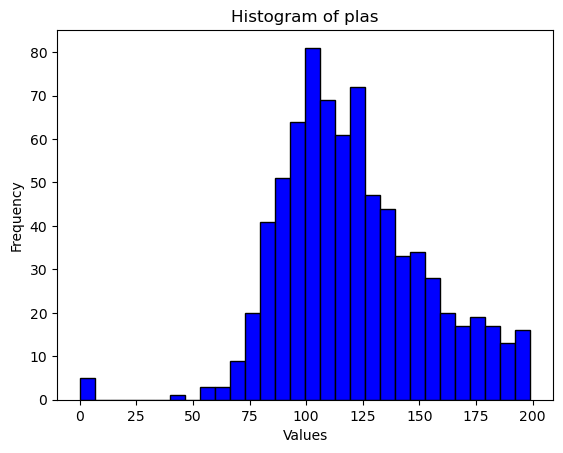

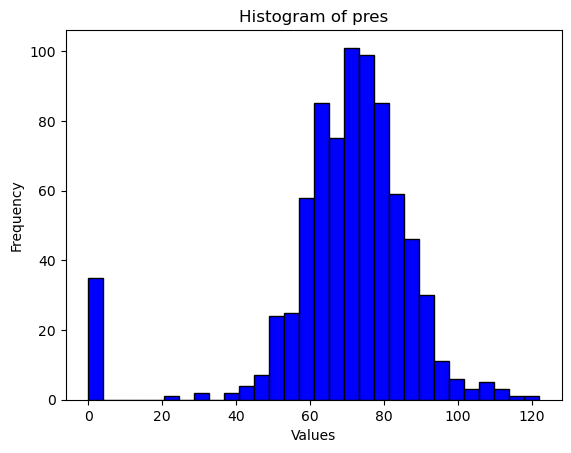

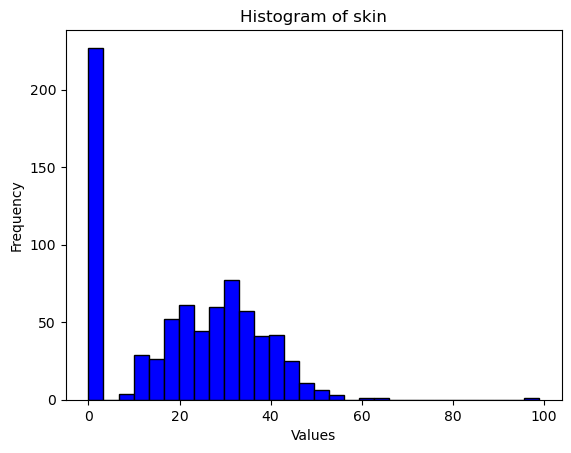

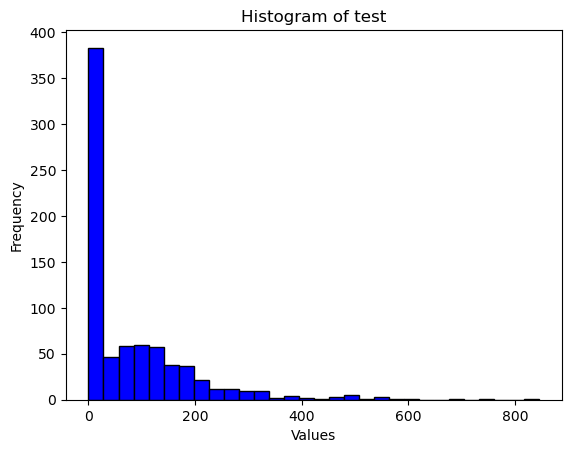

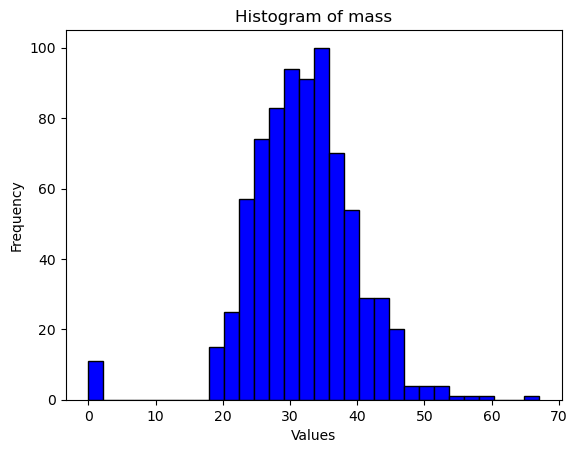

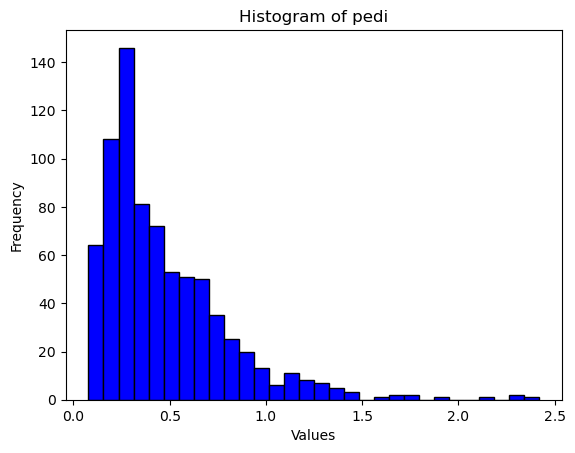

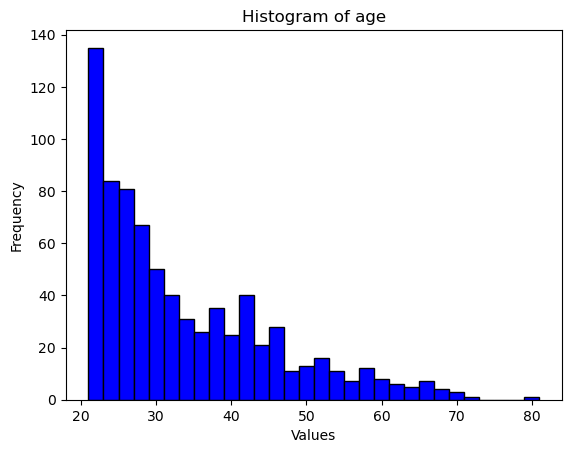

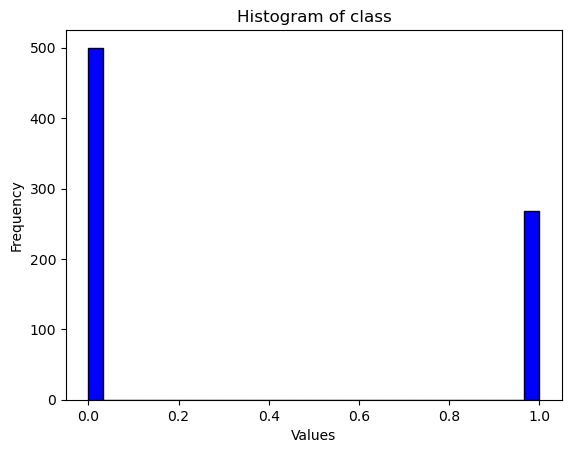

In [119]:
#Histogram of each attribute
for column in data.select_dtypes(include='number').columns:
    plt.hist(data[column], bins=30, color='blue', edgecolor='black')
    
    # Customize the plot (optional)
    plt.title(f'Histogram of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    
    # Display the histogram for each attribute
    plt.show()

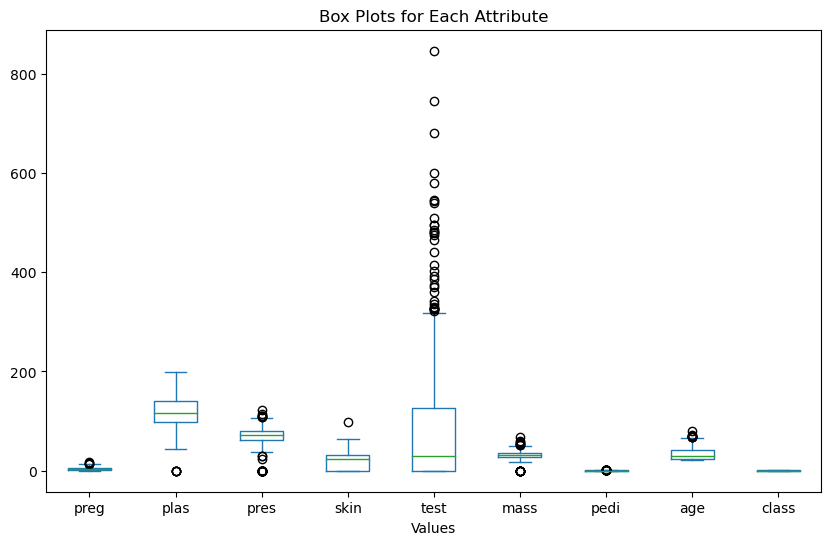

In [120]:
#Boxplot of each attribute
data.plot(kind='box', vert=True, figsize=(10, 6))

# Customize the plot (optional)
plt.title('Box Plots for Each Attribute')
plt.xlabel('Values')

# Display the box plots
plt.show()

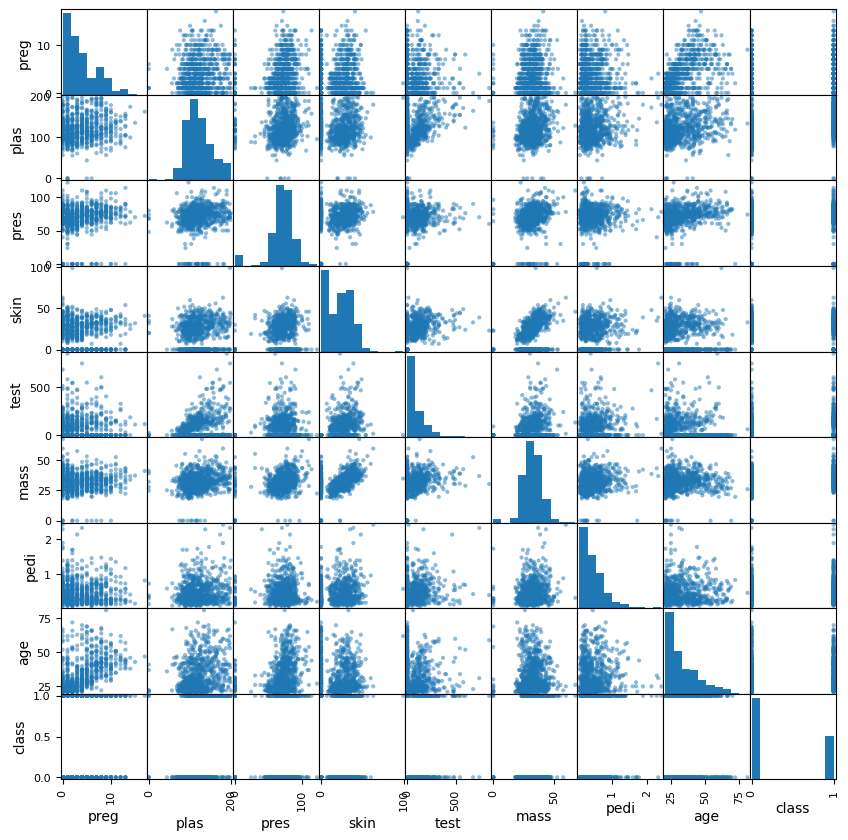

In [121]:
#pairwise scatterplots using pandas.scatter_matrix()
pd.plotting.scatter_matrix(data, figsize = (10,10))
plt.show()

### Lesson 6: Prepare For Modeling by Pre-Processing Data

In [122]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
import numpy as np
array = data.values

In [123]:
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

In [124]:
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


### Lesson 7: Algorithm Evaluation With Resampling Methods

In [125]:
# Evaluate using Cross Validation and Accuracy
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

dataframe = read_csv(url, names=names)

array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

kfold = KFold(n_splits=10, random_state=7, shuffle=True)

model = LogisticRegression(solver='liblinear')

results = cross_val_score(model, X, Y, cv=kfold)

print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 77.086% (5.091%)


### Lesson 8: Algorithm Evaluation Metrics

In [126]:
# Cross Validation Classification LogLoss
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

dataframe = read_csv(url, names=names)

array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

kfold = KFold(n_splits=10, random_state=7, shuffle=True)

model = LogisticRegression(solver='liblinear')

scoring = 'neg_log_loss'

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.494 (0.042)


In [127]:
# Confusion matrix and a classification report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

dataframe = read_csv(url, names=names)

array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

model = LogisticRegression(solver='liblinear')

# Fit the model on the training data
model.fit(X, Y)

# Make predictions on the test data
y_pred = model.predict(X)

# Generate the confusion matrix
cm = confusion_matrix(Y, y_pred)
print("Confusion Matrix:")
print(cm)

# Generate the classification report
cr = classification_report(Y, y_pred)
print("Classification Report:")
print(cr)

Confusion Matrix:
[[448  52]
 [121 147]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84       500
         1.0       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



### Lesson 9: Spot - Check Algorithms

In [128]:
# KNN Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

dataframe = read_csv(url, delim_whitespace=True, names=names)

array = dataframe.values

X = array[:,0:13]
Y = array[:,13]

kfold = KFold(n_splits=10, random_state=7, shuffle= True)

model = KNeighborsRegressor()

scoring = 'neg_mean_squared_error'

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

print(results.mean())

-38.852320266666666


In [129]:
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

dataframe = read_csv(url, names=names)

array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

# Spot check algorithms
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Evaluate each algorithm using cross-validation and print the results
for name, model in models.items():
    scores = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
    print(f"{name} - Accuracy: {scores.mean():.3f} (std: {scores.std():.3f})")


C:\Users\bhoom\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bhoom\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression - Accuracy: 0.770 (std: 0.025)
Decision Tree - Accuracy: 0.702 (std: 0.038)
Random Forest - Accuracy: 0.764 (std: 0.027)
Support Vector Machine - Accuracy: 0.759 (std: 0.020)
k-Nearest Neighbors - Accuracy: 0.724 (std: 0.020)
Naive Bayes - Accuracy: 0.751 (std: 0.019)


### Lesson 10: Model Comparison and Selection

In [130]:
# Compare Algorithms
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10, random_state=7, shuffle=True)
	cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.770865 (0.050905)
LDA: 0.766969 (0.047966)


### Lesson 11: Improve Accuracy with Algorithm Tuning

In [131]:
# Grid Search for Algorithm Tuning
from pandas import read_csv
import numpy
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid.fit(X, Y)

print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.27961755931297233
1.0


In [132]:
#Random search for algorithm tuning
from pandas import read_csv
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# Define the hyperparameter space
param_dist = {
    'n_estimators': randint(10, 100),  # Random integer between 10 and 100
    'max_depth': randint(1, 20),       # Random integer between 1 and 20
    'min_samples_split': randint(2, 10) # Random integer between 2 and 10
}

# Create the random forest classifier
rf = RandomForestClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42
)

# Fit the random search on the training data
random_search.fit(X, Y)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best model on the test data
#accuracy = best_model.score(X_test, y_test)
#print("Best Model Accuracy:", accuracy)
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 7, 'min_samples_split': 3, 'n_estimators': 92}


### Lesson 12: Improve Accuracy with Ensemble Predictions

In [133]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7656185919343814


### Lesson 13: Finalize And Save Your Model

In [134]:
# Save Model Using Pickle
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Fit the model on 67%
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.7559055118110236
